<a href="https://colab.research.google.com/github/dishantzaveri/synapsetasks/blob/main/Rajasthan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install colorgram.py

In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 9.2 MB/s 
     |████████████████████████████████| 16.7 MB 455 kB/s 
     |████████████████████████████████| 6.3 MB 51.5 MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports

In [4]:
#code to view the map through geojson file
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import imutils
from shapely.geometry import MultiPolygon
import shapely
from PIL import Image
import colorgram

# Reading and plotting the GeoJSON file

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


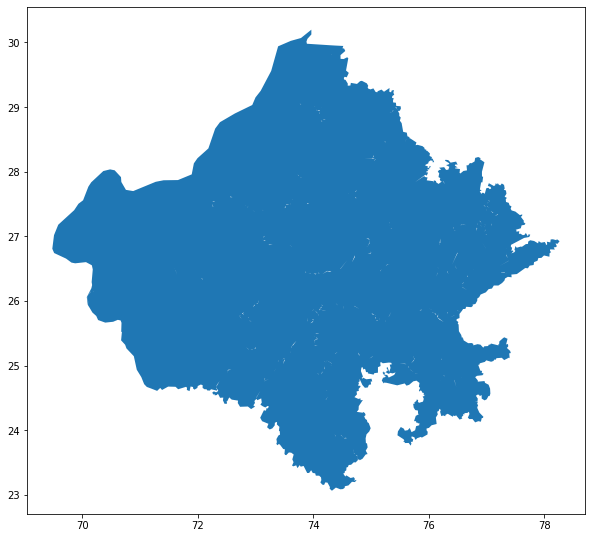

In [5]:
gdf=gpd.read_file("/content/drive/MyDrive/Rajasthan.geojson.txt")
polygon = gdf.geometry.unary_union
gdf = gpd.GeoDataFrame(geometry=[polygon], crs=gdf.crs)
gdf.plot(figsize=(10,10), edgecolor='')
plt.show()


### Removing the noise geojson data

In [6]:
vector_bound_coordinates= gdf['geometry']
coordinates=vector_bound_coordinates.bounds
coordinates

minx       miny       maxx       maxy
0  69.483734  23.062691  78.262238  30.195049

In [7]:
minx = coordinates["minx"][0]
miny = coordinates["miny"][0]
maxx = coordinates["maxx"][0]
maxy = coordinates["maxy"][0]

### Creating the bounding box for the coordinate image

In [8]:
width_1 = maxx - minx
height_1 = maxy-miny 
bottom_left_1 = (minx,miny)
bottom_right_1 = (maxx,miny)
top_left_1 = (minx,maxy)
top_right_1 = (maxx, maxy)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


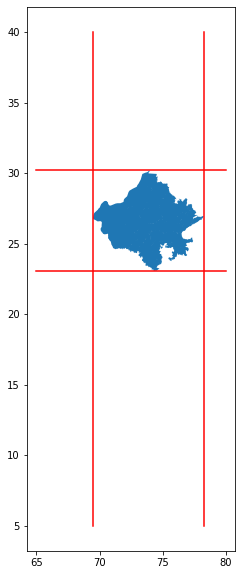

In [9]:
gdf.plot(figsize=(10,10), edgecolor='')
x = np.linspace(65,80,100)
y = [miny]*100
plt.plot(x, y, '-r')
y = [maxy]*100
plt.plot(x, y, '-r')
y = np.linspace(5,40,100)
x = [maxx]*100
plt.plot(x, y, '-r')
y = np.linspace(5,40,100)
x = [minx]*100
plt.plot(x, y, '-r')
plt.show()

# Dealing with random image of the India Map

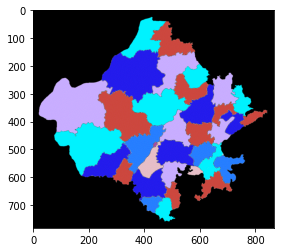

In [10]:
image = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
plt.imshow(image)

#### Converting to grayscale

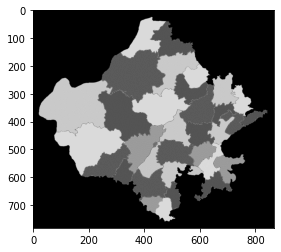

In [11]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

#### Binary image

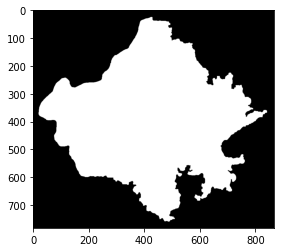

In [12]:
# load the image, convert it to grayscale, and blur it slightly
gray = cv2.GaussianBlur(gray, (5, 5), 0)
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(thresh, cmap="gray")

#### Finding contours to get borders

In [13]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

#### Finding exreme points

In [14]:
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])
# cv2.drawContours(gray, [c], -1, (0, 255, 255), 2)
# cv2.circle(gray, extLeft, 8, (255, 0, 0), -1)
# cv2.circle(gray, extRight, 8, (255, 0, 0), -1)
# cv2.circle(gray, extTop, 8, (255, 0, 0), -1)
# cv2.circle(gray, extBot, 8, (255, 0, 0), -1)

In [15]:
xmin = extLeft[0]
xmax = extRight[0]
ymin = extBot[1]
ymax = extTop[1]

In [16]:
print(xmin, xmax, ymin, ymax)
print(extLeft)
print(extRight)
print(extTop)
print(extBot)

20 841 759 25
(20, 367)
(841, 368)
(423, 25)
(485, 759)


#### Getting the bounding box

In [17]:
height_2 = ymin-ymax
width_2 = xmax-xmin

In [18]:
bottom_left = (xmin,ymin)
bottom_right = (xmax,ymin)
top_left = (xmin,ymax)
top_right = (xmax, ymax)

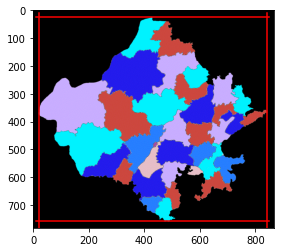

In [19]:
image = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
x = np.linspace(10,850,100)
y = [ymin]*100
plt.plot(x, y, '-r')
y = [ymax]*100
plt.plot(x, y, '-r')
y = np.linspace(10,800,100)
x = [xmax]*100
plt.plot(x, y, '-r')
x = [xmin]*100
plt.plot(x, y, '-r')
plt.imshow(image)

#Finding the scaling factor between the two

In [20]:
y_scale = height_1/height_2
x_scale = width_1/width_2

In [21]:
print(y_scale)
print(x_scale)

0.009717109742541249
0.010692452397038811


# Mapping points

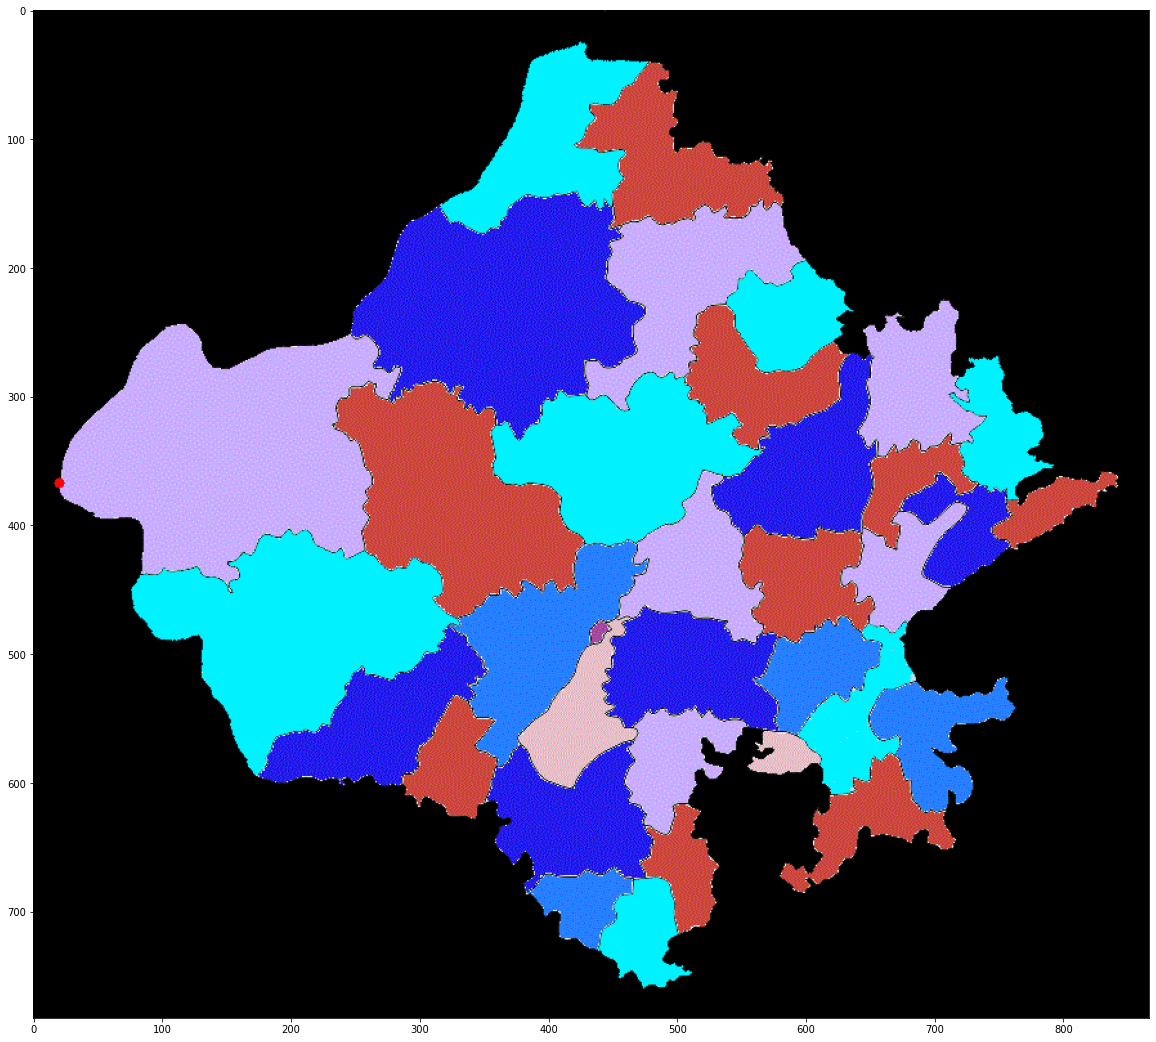

In [22]:
#consider random point on image map (1151 2051)
im = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
cv2.circle(im, ((20, 367)), 4, (255, 0, 0), -1)
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.imshow(im)

In [23]:
#dist in y
ydist = ymin - 750
xdist = 1000 - xmin

In [24]:
ydist = ydist*y_scale
xdist = xdist*x_scale

In [25]:
y_coord = miny + ydist
x_coord = minx + xdist

In [26]:
def map(x,y):
  ydist = ymin - y
  xdist = x - xmin
  ydist = ydist*y_scale
  xdist = xdist*x_scale
  y_coord = miny + ydist
  x_coord = minx + xdist

  return x_coord, y_coord

In [27]:
(x_coord, y_coord) = map(20, 367)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


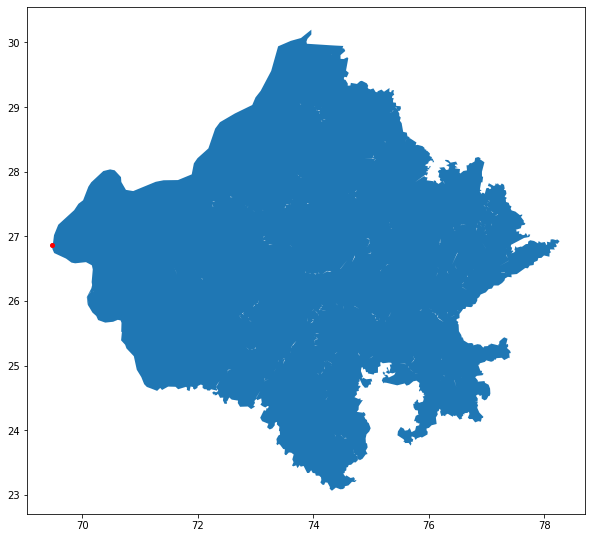

In [28]:
gdf.plot(figsize=(10,10), edgecolor='')
plt.plot(x_coord, y_coord, marker="o", markersize=4, markeredgecolor="red", markerfacecolor="red")
plt.show()

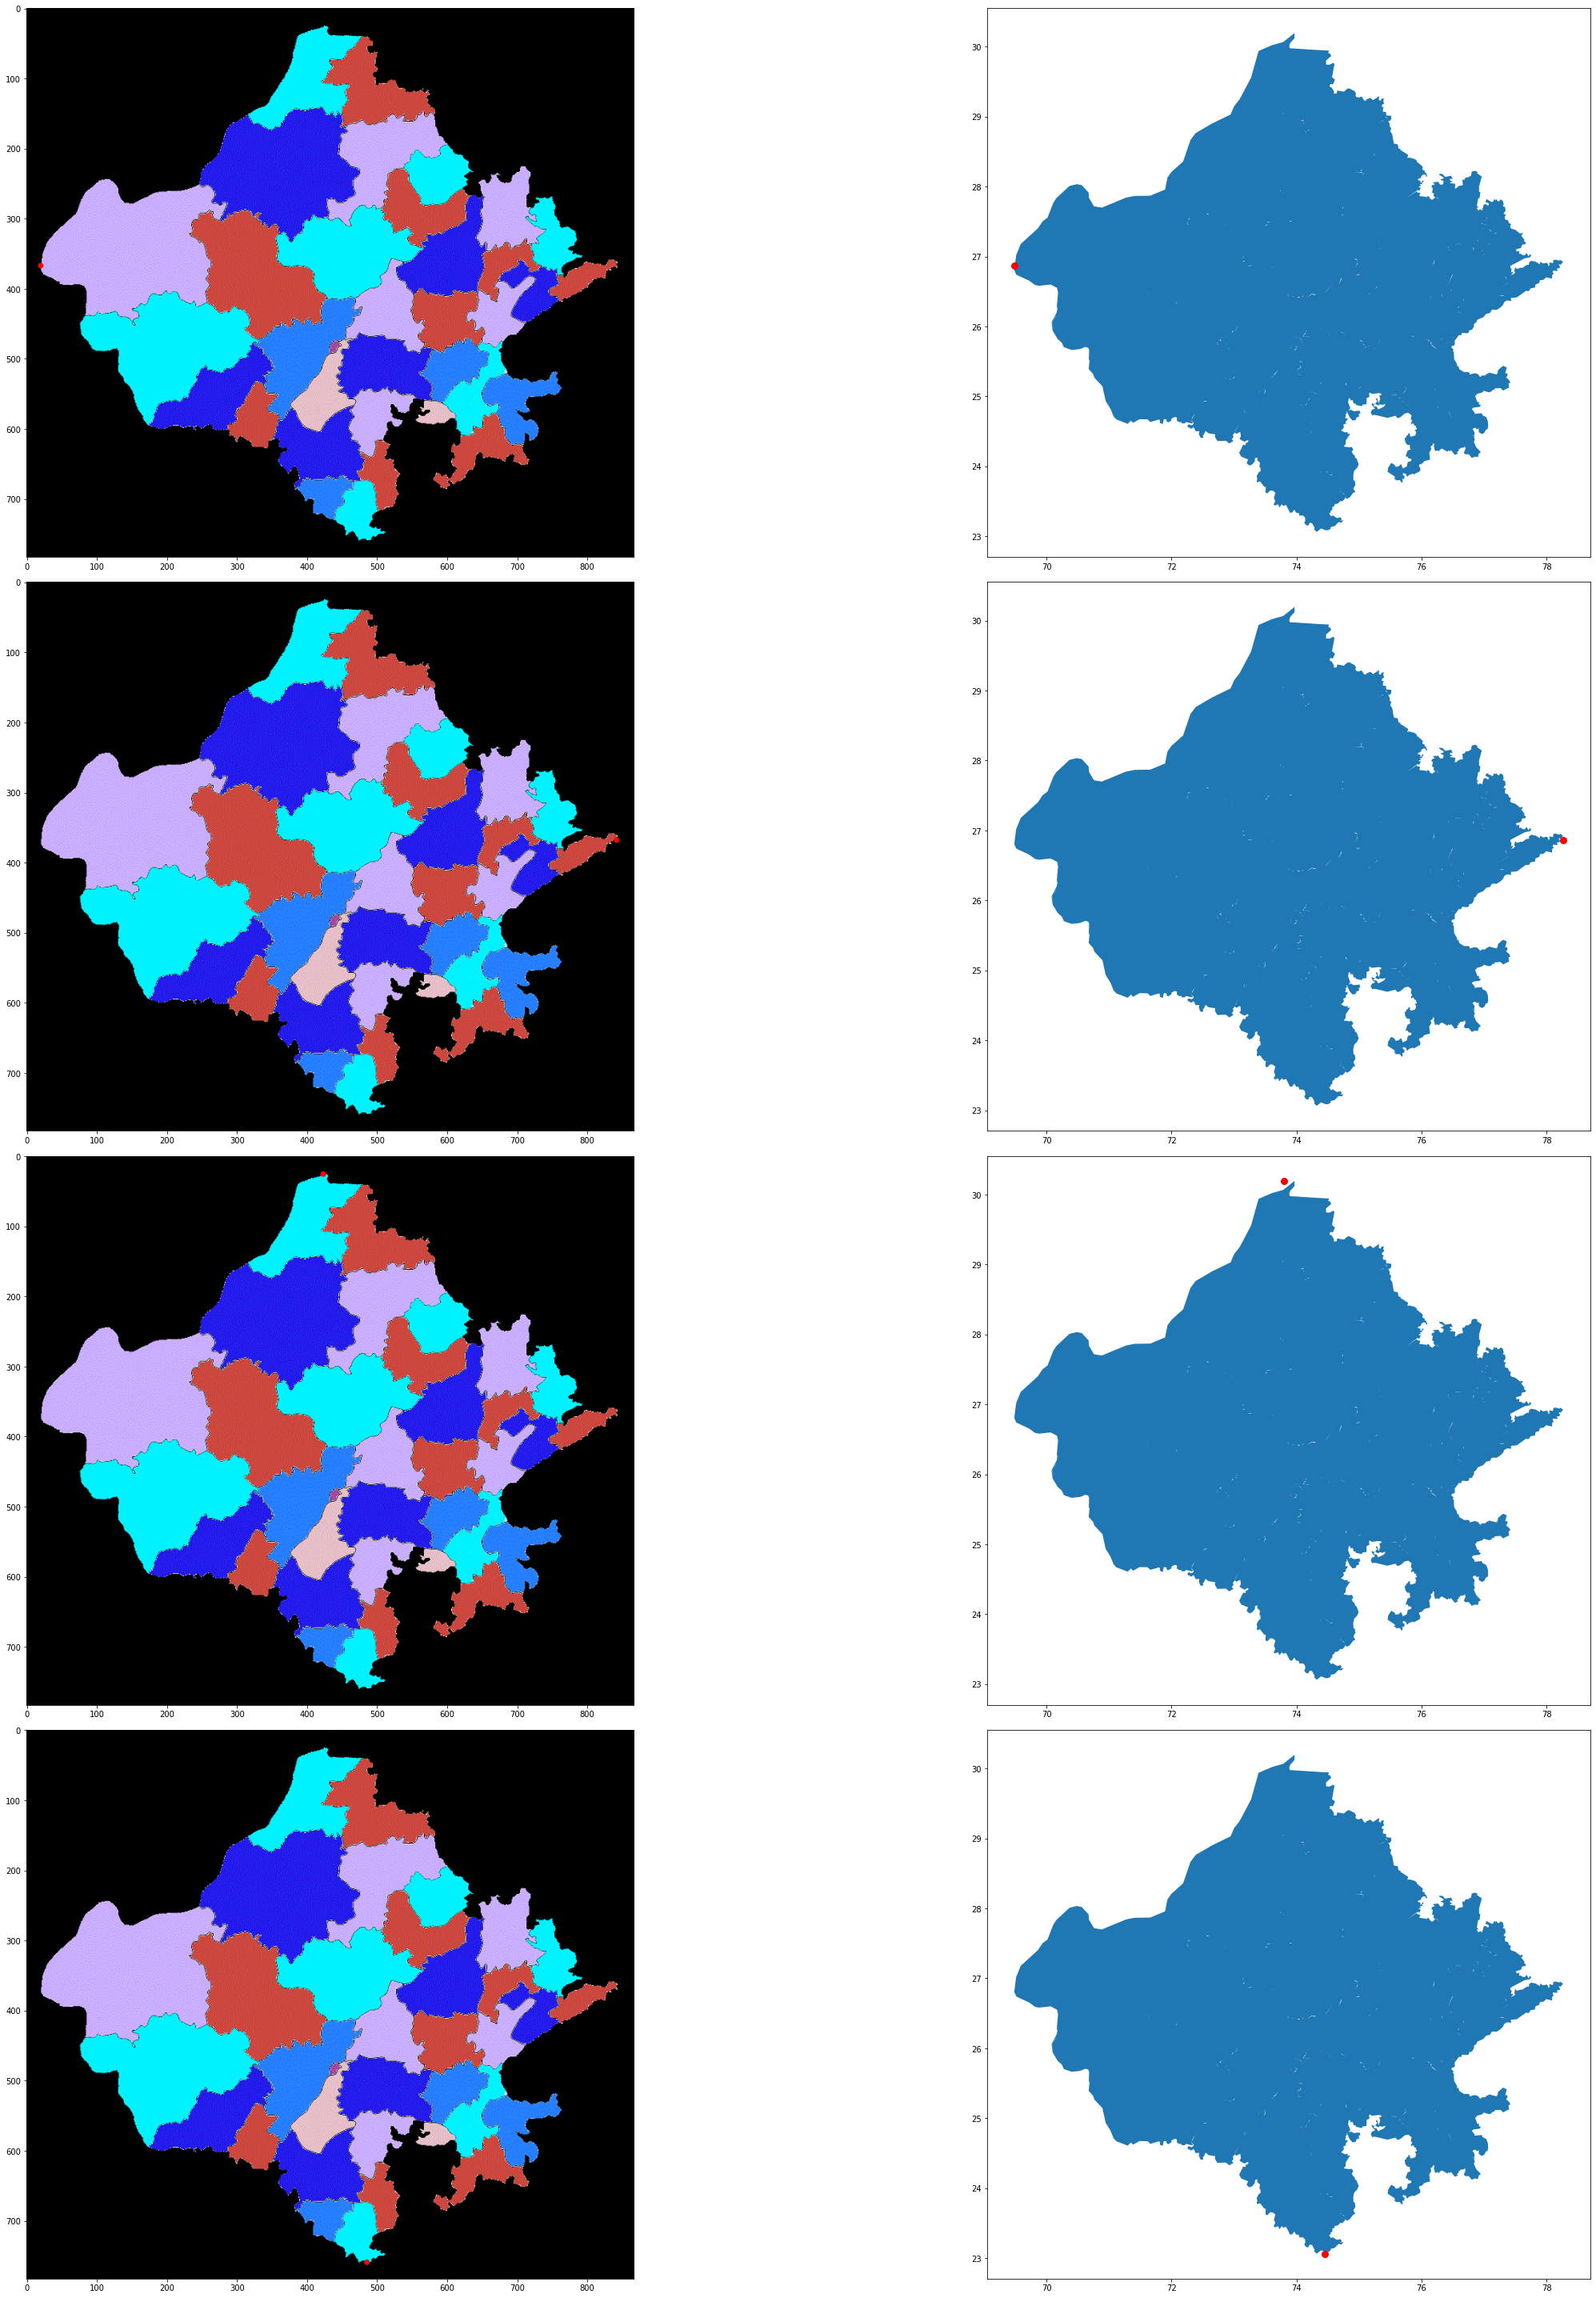

In [29]:
def plot_mappings(coord_list):
    fig, axes = plt.subplots(4, 2, figsize=(40,40))
    axes = axes.flatten()
    
    #row1
    im = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
    (x,y) = coord_list[0]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[1].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[0].imshow(im)
    gdf.plot(ax=axes[1], figsize=(10,10))

    #row2
    im = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
    (x,y) = coord_list[1]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[3].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[2].imshow(im)
    gdf.plot(ax=axes[3], figsize=(10,10))

    #row3
    im = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
    (x,y) = coord_list[2]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[5].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[4].imshow(im)
    gdf.plot(ax=axes[5], figsize=(10,10))

    #row4
    im = cv2.imread('/content/drive/MyDrive/rajasthanblack.png')
    (x,y) = coord_list[3]
    cv2.circle(im, (x,y), 4, (255, 0, 0), -1)
    (cx,cy) = map(x,y)
    axes[7].plot(cx,cy, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="red")
    axes[6].imshow(im)
    gdf.plot(ax=axes[7], figsize=(10,10))

    plt.tight_layout()
    plt.show()

plot_mappings([(20, 367), (841, 368), (423, 25), (485, 759)])





# Mapping borders
1. Contour color based
2. mapping

#### Finding all the colours in the image

In [30]:
# It is the number of colors you want to extract from the image
nb_colors = 10

# Returns a list of tuples form (r, g, b) 
image_colors = colorgram.extract("/content/drive/MyDrive/rajasthanblack.png", nb_colors)   
print(image_colors)

[<colorgram.py Color: Rgb(r=0, g=0, b=0), 60.47963001703953%>, <colorgram.py Color: Rgb(r=254, g=241, b=0), 9.77513250749372%>, <colorgram.py Color: Rgb(r=255, g=170, b=204), 9.323353417727178%>, <colorgram.py Color: Rgb(r=57, g=80, b=203), 5.62975194469419%>, <colorgram.py Color: Rgb(r=254, g=43, b=51), 3.0260735143111286%>, <colorgram.py Color: Rgb(r=254, g=128, b=51), 2.781898813620764%>, <colorgram.py Color: Rgb(r=236, g=0, b=50), 2.693587100421437%>, <colorgram.py Color: Rgb(r=51, g=43, b=203), 2.3031311532743204%>, <colorgram.py Color: Rgb(r=234, g=44, b=0), 2.134013424019189%>, <colorgram.py Color: Rgb(r=196, g=46, b=55), 1.8534281073985415%>]


In [31]:
def render(color):
    w, h = 512, 512
    data = np.zeros((h, w, 3), dtype=np.uint8)
    r, g, b = color
    data[0:512, 0:512] = [r, g, b]
    img = Image.fromarray(data, 'RGB')
    return img

def plotImages(images_arr,x,y):
    fig, axes = plt.subplots(x, y, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

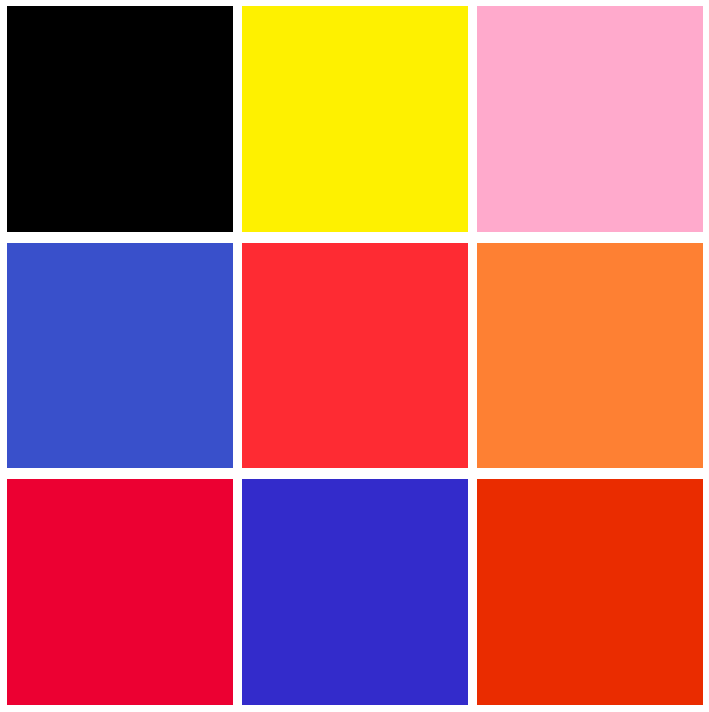

In [32]:
img_ar = []
img_arr = []
img_list=[]
for i in range(len(image_colors)):
    img_ar.append((image_colors[i].rgb.r,image_colors[i].rgb.g,image_colors[i].rgb.b))
    img_list.append([image_colors[i].rgb.r,image_colors[i].rgb.g,image_colors[i].rgb.b])
img_arr = []
for i in range(len(img_ar)):
    img_arr.append(render(img_ar[i]))

plotImages(img_arr,3,3)

#### Creating mask for the image

In [33]:
def find_mask(image, lower, upper):
    ''' Define the color of the region whose contours are to be detected '''
    return cv2.inRange(image, lower, upper)

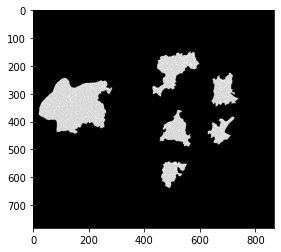

In [34]:
BGR = np.array(img_list[2])
BGR=BGR[::-1] 
path = "/content/drive/MyDrive/rajasthanblack.png"

upper = BGR + 10
lower = BGR - 10
image = cv2.imread(path)

# Take the contours according to the given color only
mask = find_mask(image, lower, upper)

plt.imshow(mask, cmap="gray")

#### Manual extraction of the top left state

In [35]:
(h,w) = mask.shape
for i in range(h):
  for j in range(w):
    if i>500:
      mask[i][j] = 0
    elif j>300:
      mask[i][j] = 0
    else:
      pass

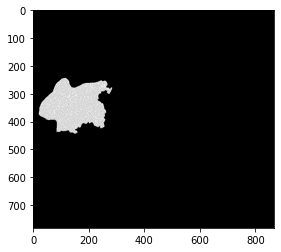

In [36]:
plt.imshow(mask, cmap="gray")

#### Finding contours

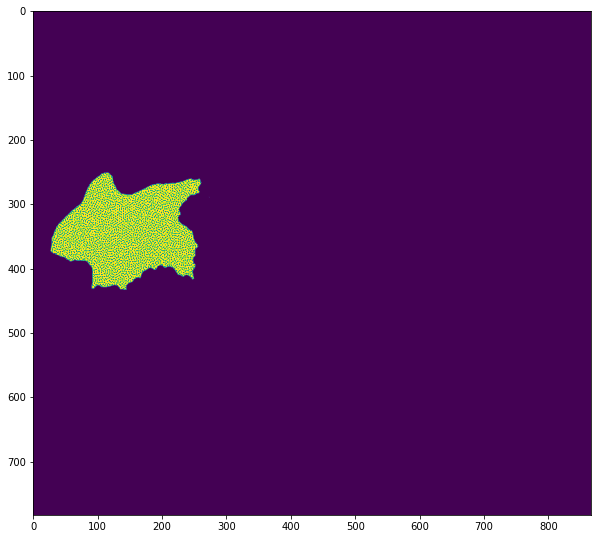

In [37]:
mask_name="mask"+str(i)+".png"
image1= mask.copy()
# img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(image1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2[0], -1, (0, 255, 0), 10, cv2.LINE_AA)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(image_copy2)
image_copy3 = image1.copy()
contour1=0
for i, contour in enumerate(contours2): # loop over one contour area
    for j, contour_point in enumerate(contour): # loop over the points
        contour1=contour1+1
    # draw a circle on the current contour coordinate
        cv2.circle(image_copy3, ((contour_point[0][0], contour_point[0][1])), 1, (0, 255, 0), 10, cv2.LINE_AA)

In [38]:
print(contours2[2])

[[[156 440]]

 [[157 439]]

 [[158 440]]

 [[157 441]]]


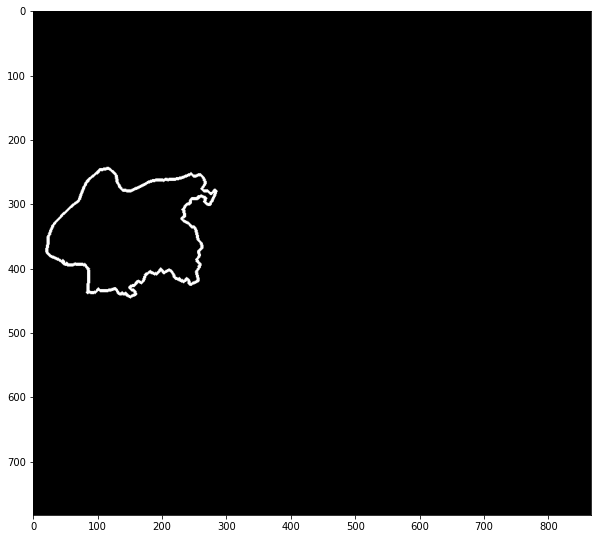

In [39]:
im_new = np.zeros(mask.shape)
for i in contours2[0]:
  for j in i:
    cv2.circle(im_new, (j[0],j[1]), 2, (255, 255, 255), -1)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.imshow(im_new, cmap="gray")

#### Mapping

In [40]:
ll = []
for i in contours2[0]:
  for j in i:
    x,y = map(j[0], j[1])
    ll.append((x,y))

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


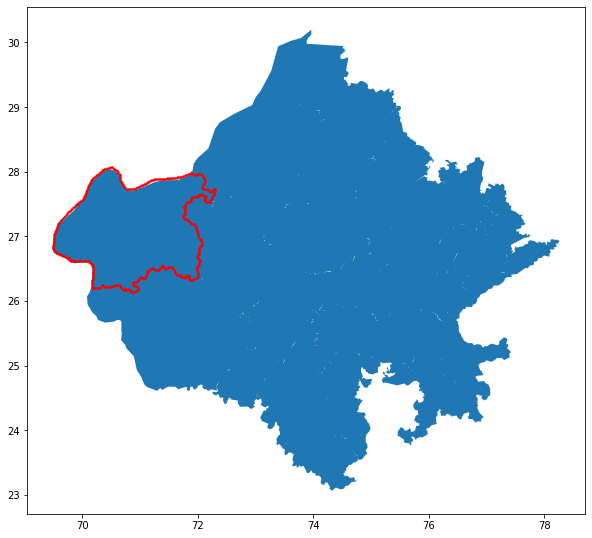

In [41]:
gdf.plot(figsize=(10,10), edgecolor='')
for i in ll:
  plt.plot(i[0], i[1], marker="o", markersize=1, markeredgecolor="red", markerfacecolor="red")
plt.show()

#### Error offset handling

In [43]:
ll

[(70.48882465618108, 28.06700225227214),
 (70.47813220378404, 28.057285142529597),
 (70.467439751387, 28.057285142529597),
 (70.45674729898997, 28.057285142529597),
 (70.44605484659293, 28.057285142529597),
 (70.43536239419589, 28.057285142529597),
 (70.42466994179885, 28.047568032787055),
 (70.4139774894018, 28.047568032787055),
 (70.40328503700476, 28.047568032787055),
 (70.39259258460773, 28.047568032787055),
 (70.38190013221069, 28.047568032787055),
 (70.37120767981365, 28.047568032787055),
 (70.37120767981365, 28.037850923044516),
 (70.36051522741661, 28.028133813301974),
 (70.34982277501958, 28.01841670355943),
 (70.33913032262254, 28.01841670355943),
 (70.34982277501958, 28.008699593816893),
 (70.33913032262254, 27.99898248407435),
 (70.3284378702255, 27.99898248407435),
 (70.31774541782846, 27.99898248407435),
 (70.30705296543142, 27.989265374331808),
 (70.29636051303439, 27.97954826458927),
 (70.28566806063735, 27.969831154846727),
 (70.27497560824031, 27.960114045104184),
 (7

# Getting GeoJSON

In [44]:
from shapely.geometry import Polygon